

```
The following code is for a Generative Adverserial Network (GAN)
```



In [ ]:
import torch
from torch import nn

import math
import matplotlib.pyplot as plt

In [ ]:
torch.manual_seed(111)

In [ ]:
train_data_length = 1024
train_data = torch.zeros((train_data_length, 2))
train_data[:, 0] = 2 * math.pi * torch.rand(train_data_length)
train_data[:, 1] = torch.normal(train_data[:, 0])
train_labels = torch.zeros(train_data_length)
train_set = [
    (train_data[i], train_labels[i]) for i in range(train_data_length)
]

Text(0.5, 1.0, 'Training data')

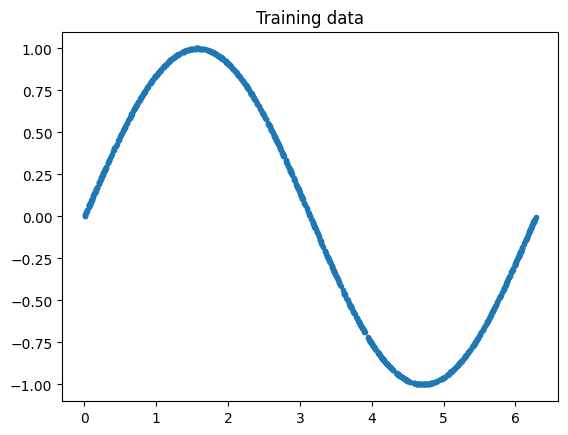

In [ ]:
plt.plot(train_data[:, 0], train_data[:, 1], ".")
plt.title("Training data")

In [ ]:
batch_size = 32
train_loader = torch.utils.data.DataLoader(
    train_set, batch_size=batch_size, shuffle=True
)

In [ ]:
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(2, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, 1),
            nn.Sigmoid(),
        )

    def forward(self, x):
        output = self.model(x)
        return output

In [ ]:
discriminator = Discriminator()

In [ ]:
class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(2, 16),
            nn.ReLU(),
            nn.Linear(16, 32),
            nn.ReLU(),
            nn.Linear(32, 2),
        )

    def forward(self, x):
        output = self.model(x)
        return output

generator = Generator()

In [ ]:
lr = 0.001
num_epochs = 300
epochs = list(range(1,num_epochs+1))
loss_function = nn.BCELoss() #This is a binary classification task therefore, binary cross entropy loss

In [ ]:
optimizer_discriminator = torch.optim.Adam(discriminator.parameters(), lr=lr)
optimizer_generator = torch.optim.Adam(generator.parameters(), lr=lr)

In [ ]:
discriminator_loss = []
generator_loss = []
for epoch in range(num_epochs):
    for n, (real_samples, _) in enumerate(train_loader):
        # Data for training the discriminator
        real_samples_labels = torch.ones((batch_size, 1))
        latent_space_samples = torch.randn((batch_size, 2))
        generated_samples = generator(latent_space_samples)
        generated_samples_labels = torch.zeros((batch_size, 1))
        all_samples = torch.cat((real_samples, generated_samples))
        all_samples_labels = torch.cat(
            (real_samples_labels, generated_samples_labels)
        )

        # Training the discriminator
        discriminator.zero_grad()
        output_discriminator = discriminator(all_samples)
        loss_discriminator = loss_function(
            output_discriminator, all_samples_labels)
        loss_discriminator.backward()
        optimizer_discriminator.step()

        # Data for training the generator
        latent_space_samples = torch.randn((batch_size, 2))

        # Training the generator
        generator.zero_grad()
        generated_samples = generator(latent_space_samples)
        output_discriminator_generated = discriminator(generated_samples)
        loss_generator = loss_function(
            output_discriminator_generated, real_samples_labels
        )
        loss_generator.backward()
        optimizer_generator.step()

        discriminator_loss.append(loss_discriminator.detach().numpy())
        generator_loss.append(loss_generator.detach().numpy())
        # Show loss
        if epoch % 30 == 0 and n == batch_size - 1:
            print(f"Epoch: {epoch} Loss D.: {loss_discriminator}")
            print(f"Epoch: {epoch} Loss G.: {loss_generator}")

Epoch: 0 Loss D.: 0.2411835640668869
Epoch: 0 Loss G.: 2.1886584758758545
Epoch: 30 Loss D.: 0.6423924565315247
Epoch: 30 Loss G.: 0.8260427713394165
Epoch: 60 Loss D.: 0.6831433176994324
Epoch: 60 Loss G.: 0.7246468663215637
Epoch: 90 Loss D.: 0.6651811003684998
Epoch: 90 Loss G.: 0.7966150045394897
Epoch: 120 Loss D.: 0.6041363477706909
Epoch: 120 Loss G.: 0.7743225693702698
Epoch: 150 Loss D.: 0.6694660186767578
Epoch: 150 Loss G.: 0.6810845136642456
Epoch: 180 Loss D.: 0.6785462498664856
Epoch: 180 Loss G.: 0.7347885370254517
Epoch: 210 Loss D.: 0.6603792905807495
Epoch: 210 Loss G.: 0.7645474076271057
Epoch: 240 Loss D.: 0.6632261276245117
Epoch: 240 Loss G.: 0.7825986742973328
Epoch: 270 Loss D.: 0.6787421703338623
Epoch: 270 Loss G.: 0.710748553276062


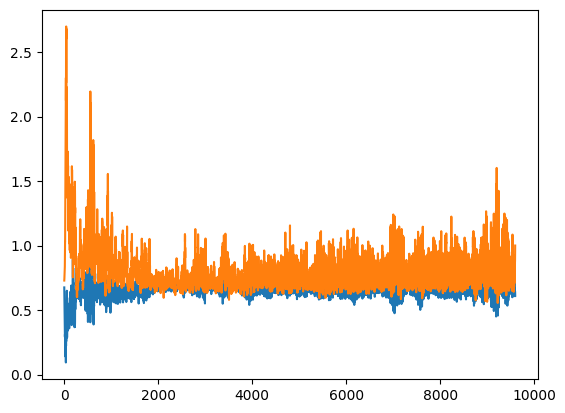

In [ ]:
plt.plot(discriminator_loss)
plt.plot(generator_loss)

In [ ]:
latent_space_samples = torch.randn(500, 2)
generated_samples = generator(latent_space_samples)

Text(0.5, 1.0, 'Generated samples')

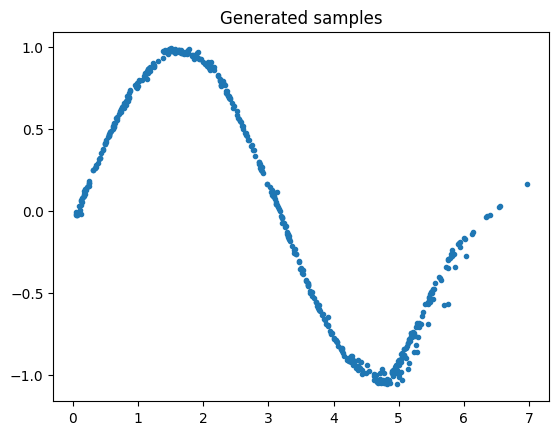

In [ ]:
generated_samples = generated_samples.detach()
plt.plot(generated_samples[:, 0], generated_samples[:, 1], ".")
plt.title("Generated samples")